# Homework : Week 1
### José Moran

In [1]:
%pylab inline

import numpy as np 
import random
import matplotlib.pyplot as plt
np.set_printoptions(precision = 4, suppress=True)

Populating the interactive namespace from numpy and matplotlib


## Part 1

In [2]:
def markov_pi(N, delta):
    x, y = 1.0, 1.0
    n_hits = 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
           x, y = x + del_x, y + del_y
        if x**2 + y**2 < 1.0: n_hits += 1
    return n_hits

In [3]:
n_runs = 1000
delta = 0.1

We create a function to calculate the average value obtained for pi in the simulation, as well as the average of the square value obtained, so that we can get the variance on our simulation of fixed length n_runs.

In [4]:
def average_values(n_trials, delta=0.1, n_runs=1000):
    values = np.zeros(n_runs)
    sqvals = np.zeros(n_runs)
    for run in xrange(n_runs):
        values[run] = 4.0 * markov_pi(n_trials, delta) /float(n_trials)
        sqvals[run] = values[run]**2
    avg = sum(values)/n_runs
    sqavg = sum(sqvals)/n_runs
    return avg, sqavg

### 1.1
We then proceed to calculate the average value obtained for $\pi$ with increasing values of n_trials, calculating the variance as well. 

In [5]:
trials = [500, 1000, 2000, 10000, 15000, 20000]

In [6]:
for n_trials in trials:
    avg, sqavg = average_values(n_trials)
    print "Average value for %d trials : %f with variance %f" % (n_trials, avg, np.sqrt(sqavg-avg**2))

Average value for 500 trials : 2.757328 with variance 0.611769
Average value for 1000 trials : 2.928196 with variance 0.434981
Average value for 2000 trials : 3.052742 with variance 0.313476
Average value for 10000 trials : 3.121540 with variance 0.139659
Average value for 15000 trials : 3.130571 with variance 0.114863
Average value for 20000 trials : 3.137014 with variance 0.099360


The value seems to approach $\pi$, we get a close enough value for $2\cdot 10^4$ trials and we get an increasingly small variance, implying that our algorithm converges. 

We now will calculate the acceptance ratio and see how it varies with the length of the Monte-Carlo step $\Delta$.

In [7]:
def markov_pi2(N, delta):
    x, y = 1.0, 1.0
    n_hits = 0 
    n_acc = 0
    for i in xrange(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x+del_x) < 1.0 and abs(y+del_y) < 1.0:
            x, y = x+del_x, y+del_y
            n_acc+=1
        if x**2+y**2<1.0: n_hits += 1
    return n_hits, n_acc/float(N)
    

In [8]:
deltas = np.arange(0.1, 5.1, 0.1)

In [9]:
ratios = []
n_runs = 500
n_trials = 1000
for delta in deltas:
    accept = np.zeros(n_runs)
    for run in xrange(n_runs):
        n_hits, acc = markov_pi2(n_trials,delta)
        accept[run]=acc
    ratios.append(sum(accept)/float(n_runs))

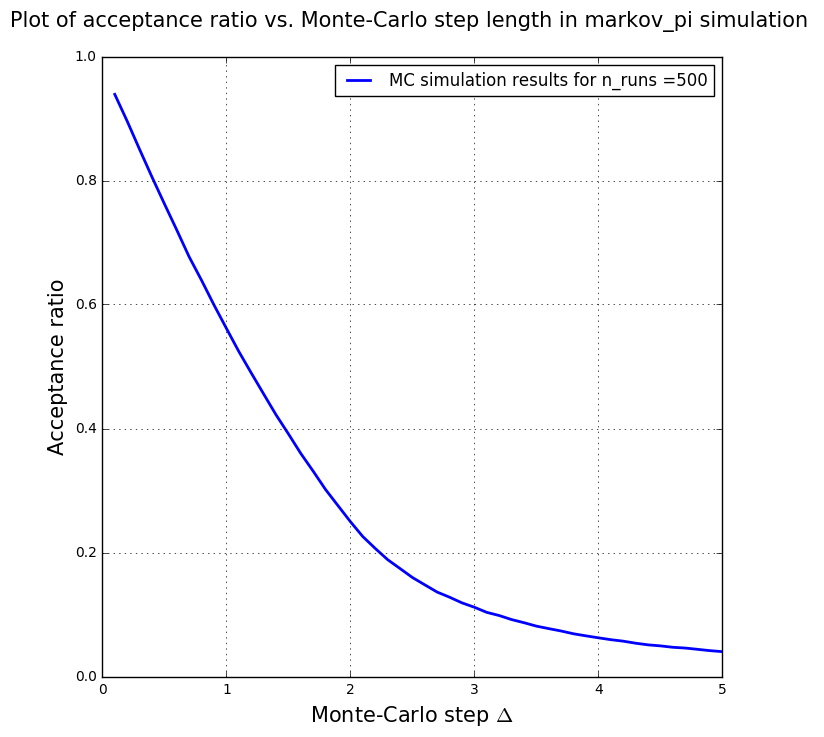

In [10]:
fig = plt.figure(figsize(8,8))
plt.plot(deltas,ratios, ls='-', lw=2, label = "MC simulation results for n_runs ="+str(n_runs))
plt.legend()
plt.grid()
plt.xlabel("Monte-Carlo step $\Delta$", fontsize=15)
plt.ylabel("Acceptance ratio", fontsize=15)
plt.title("Plot of acceptance ratio vs. Monte-Carlo step length in markov_pi simulation \n", fontsize=15)
plt.show()
plt.close()

To find the optimal value that gets us an acceptance ratio of 0.5, we zoom into the area in the following plot.

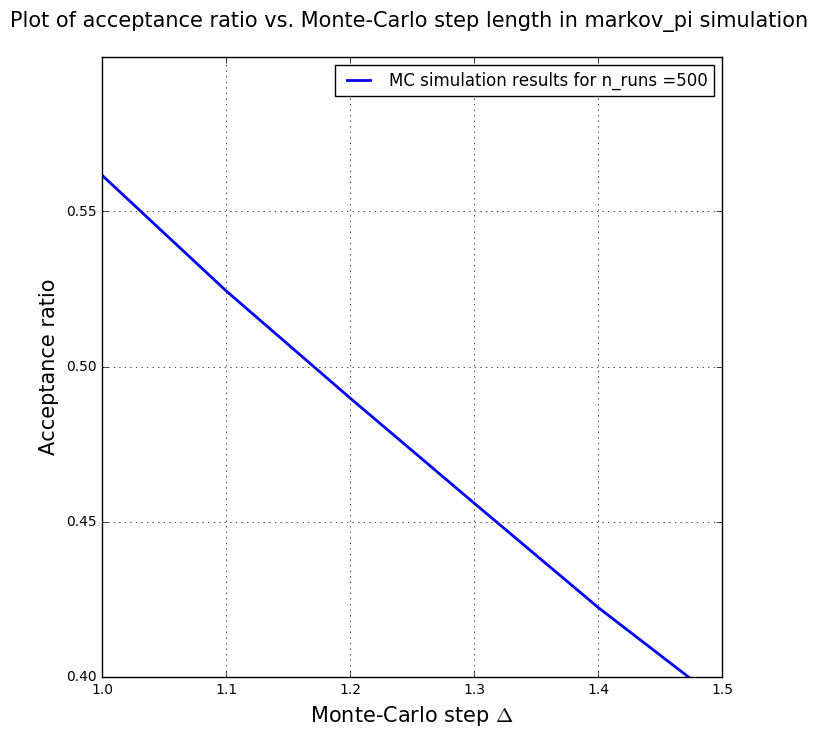

In [11]:
fig = plt.figure(figsize(8,8))
plt.plot(deltas,ratios, ls='-', lw=2, label = "MC simulation results for n_runs ="+str(n_runs))
plt.legend()
ymin, ymax = 0.4, 0.6
xmin, xmax = 1,1.5
plt.axis([xmin,xmax,ymin,ymax])
plt.grid()
plt.xlabel("Monte-Carlo step $\Delta$", fontsize=15)
plt.ylabel("Acceptance ratio", fontsize=15)
plt.title("Plot of acceptance ratio vs. Monte-Carlo step length in markov_pi simulation \n", fontsize=15)
plt.show()
plt.close()

### 1.2
The interval is therefore $[1.15,1.25]$

### 1.3
Let us now see how the standard deviation varies with $\Delta$.

In [12]:
std_dev = []
n_runs = 500
n_trials = 1000
for delta in deltas:
    sqvalues = np.zeros(n_runs)
    values = np.zeros(n_runs)
    for run in xrange(n_runs):
        n_hits, acc = markov_pi2(n_trials,delta)
        values[run] = 4.0 * markov_pi(n_trials, delta) /float(n_trials)
        sqvalues[run] = values[run]**2
    std_dev.append(np.sqrt(sum(sqvalues)/float(n_runs)-(sum(values)/float(n_runs))**2))

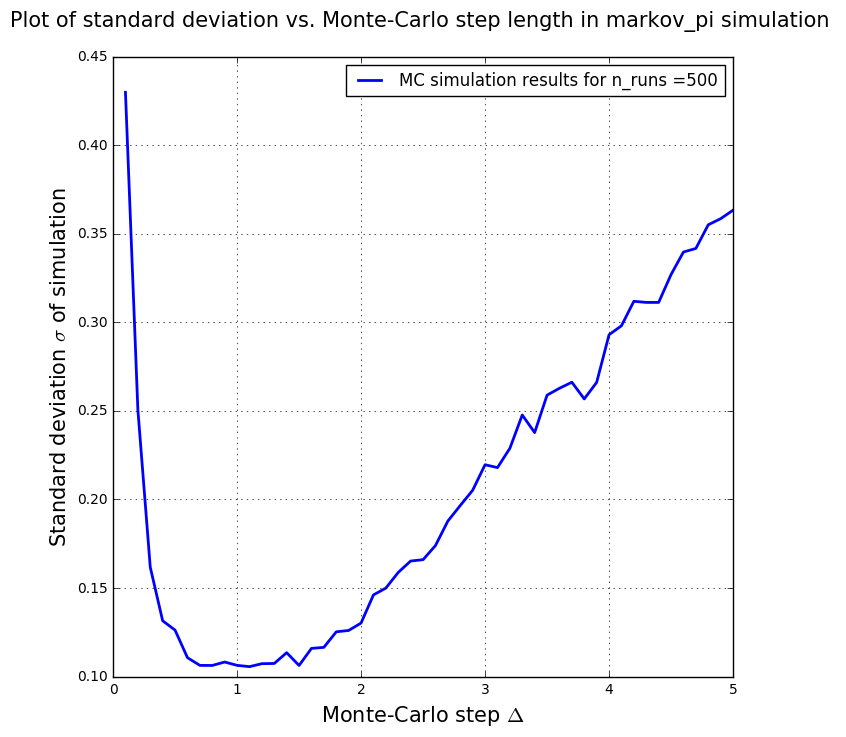

In [13]:
fig = plt.figure(figsize(8,8))
plt.plot(deltas,std_dev, ls='-', lw=2, label = "MC simulation results for n_runs ="+str(n_runs))
plt.legend()
plt.grid()
plt.xlabel("Monte-Carlo step $\Delta$", fontsize=15)
plt.ylabel("Standard deviation $\sigma$ of simulation", fontsize=15)
plt.title("Plot of standard deviation vs. Monte-Carlo step length in markov_pi simulation \n", fontsize=15)
plt.show()
plt.close()

We can therefore see that the standard deviation has a minimum around $\Delta=1$. **This seems show that our rule of thumb of choosing an acceptance ratio of 0.5 is valid**.

## Part 2 

In the page-rank algorithm, if we are in a page $A\in E$ where $E$ is the set of all pages, since at each step we choose a link at random (that is with uniform probability) and follow it, it is quite immediate that the transition rate of our Monte-Carlo chain is : 

$t_{A\rightarrow B} = \left\{\begin{matrix}
\frac{1}{C(A)} &\mbox{ if A and B are linked }\\  
0 &\mbox{ else}
\end{matrix}\right. $ 

where $C(A)$ is the number of links at page $A$. 

If we apply this to our balance equation : 

$\begin{align}\sum_{B\in E\setminus A} \mathbb{P}(B) t_{B\rightarrow A} &= \sum_{B\in E\setminus A} \mathbb{P}(A) t_{A\rightarrow B} \\
 &= \mathbb{P}(A) \end{align} $
 
Then we immediately get $\mathbb{P}(A)=\sum \frac{\mathbb{P}(B_i)}{C(B_i)}$

Let us now implement this using the method from tutorial 1 

In [14]:
neighbors =  np.asarray([[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]])

#calculate the number of links in a given page that lead to a new page
links = np.zeros(9)
for i in xrange(9):
    links[i] = np.sum(neighbors[i]!=i)

#calculate transfer matrix, imposing that we always go to a new page
transfer = np.zeros((9,9))
for a in xrange(9):
    for b in neighbors[a]:
        transfer[a,b] = 1/float(links[b]) if a!=b else 0

print transfer

[[ 0.      0.3333  0.      0.3333  0.      0.      0.      0.      0.    ]
 [ 0.5     0.      0.5     0.      0.25    0.      0.      0.      0.    ]
 [ 0.      0.3333  0.      0.      0.      0.3333  0.      0.      0.    ]
 [ 0.5     0.      0.      0.      0.25    0.      0.5     0.      0.    ]
 [ 0.      0.3333  0.      0.3333  0.      0.3333  0.      0.3333  0.    ]
 [ 0.      0.      0.5     0.      0.25    0.      0.      0.      0.5   ]
 [ 0.      0.      0.      0.3333  0.      0.      0.      0.3333  0.    ]
 [ 0.      0.      0.      0.      0.25    0.      0.5     0.      0.5   ]
 [ 0.      0.      0.      0.      0.      0.3333  0.      0.3333  0.    ]]


In [15]:
#We check the normalization for the columns
print("summing columns")
print([ sum(transfer[:,j]) for j in range(9)])

summing columns
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


We have thus created our transfer matrix $T$. We will now see how the position of a random walker using the page-rank algorithm converges (or doesn't....) to a stationary probability distribution. To do this, we'll start off with a position uniformly distributed among all sites. 

In [16]:
position = 1/9.*np.ones(9)

In [17]:
positions = []
steps = [5,10,100]
for i in range(101):
    position = np.dot(transfer,position)
    if i in steps:
        positions.append(position)

In [20]:
def bar_plot(pos, it):
    figure = plt.figure(figsize(5,4))
    plt.bar(range(len(pos)), pos, width=0.95)
    plt.axis([0,9,0,1])
    plt.grid()
    plt.xlabel("Page number")
    plt.ylabel("Page-rank probability")
    plt.title("Page-rank plot at t="+str(it))
    plt.show()

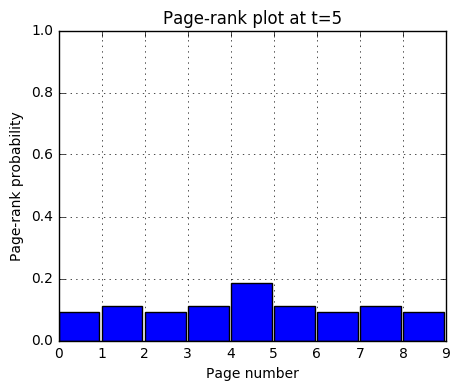

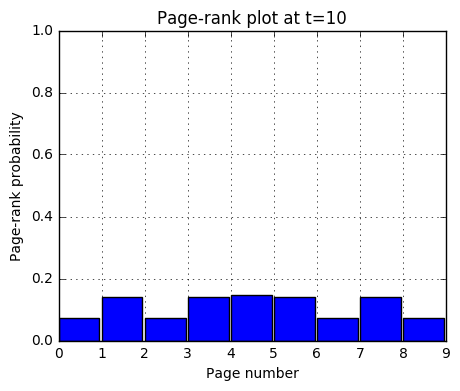

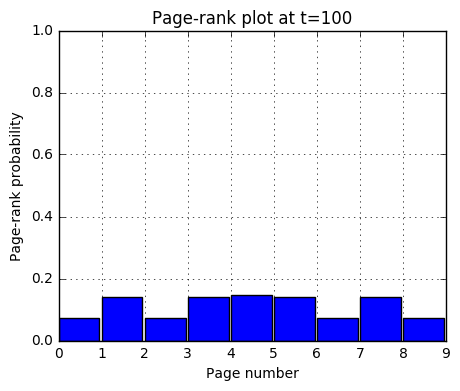

In [21]:
for i in range(len(positions)):
    bar_plot(positions[i],steps[i])

Let's now try with a different starting probability, namely placing the random-walker at the central page (labeled 4) : 

In [25]:
position = np.zeros(9)
position[4]=1.
positions = []
steps = [5,10,100]
for i in range(101):
    position = np.dot(transfer,position)
    if i in steps:
        positions.append(position)

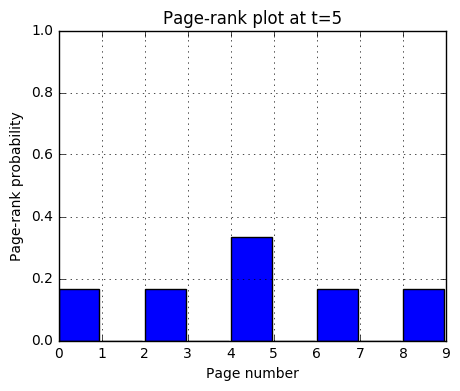

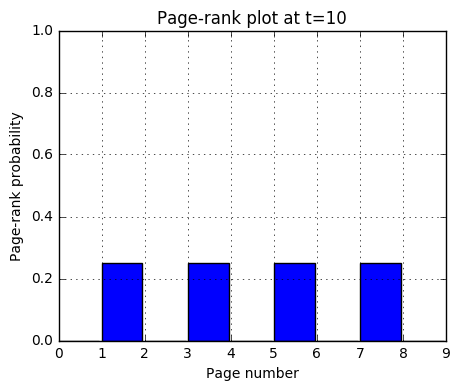

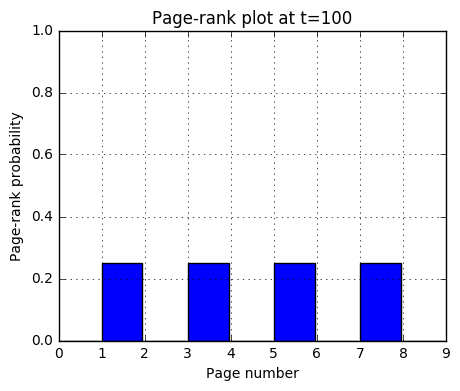

In [26]:
for i in range(len(positions)):
    bar_plot(positions[i],steps[i])

Let's see what happens if we pick steps of different parity : 

In [27]:
position = np.zeros(9)
position[4]=1.
positions = []
steps = [5,89,94]
for i in range(101):
    position = np.dot(transfer,position)
    if i in steps:
        positions.append(position)

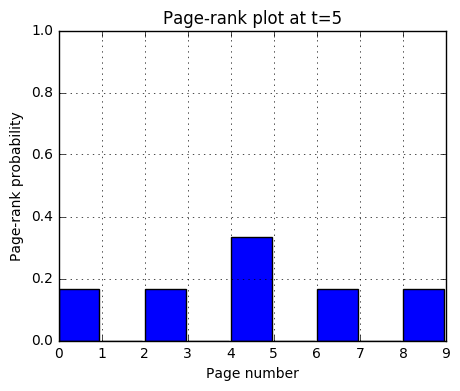

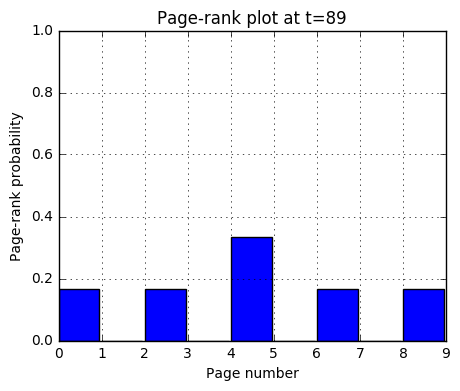

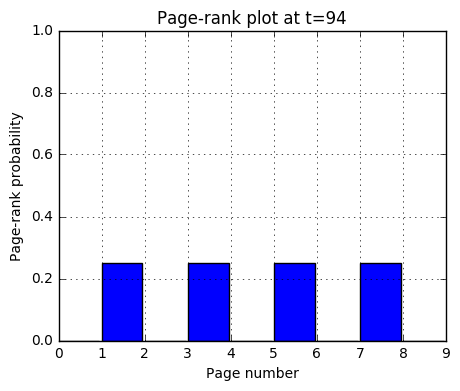

In [28]:
for i in range(len(positions)):
    bar_plot(positions[i],steps[i])

The probability distribution seems to be radically different if the iteration t is even or odd. Let's look at the spectrum of $T$: 

In [29]:
w, v = np.linalg.eig(transfer)
print w

[ 1.0000+0.j -1.0000+0.j -0.5774+0.j -0.5774+0.j  0.5774+0.j  0.5774+0.j
  0.0000+0.j  0.0000-0.j  0.0000+0.j]


We have -1 as an eigenvalue, which means that, in the general case, we will not reach the desired stationary probability because of the oscillations induced by this eigenvalue. Let's look at the purely antiperiodic eigenvector (for eigenvalue -1) as well as the "desired" distribution (the eigenvector for 1).

In [36]:
prank = v[:,0]/np.sum(v[:,0])
antip = v[:,1]

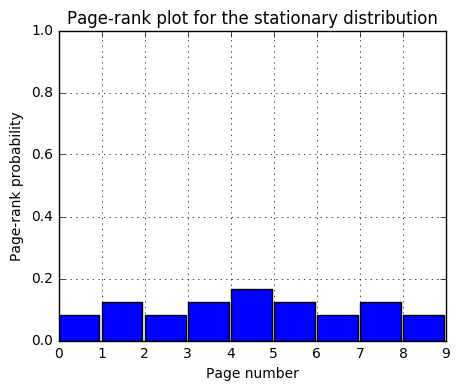

In [37]:
figure = plt.figure(figsize(5,4))
plt.bar(range(len(prank)), np.real(prank), width=0.95)
plt.axis([0,9,0,1])
plt.grid()
plt.xlabel("Page number")
plt.ylabel("Page-rank probability")
plt.title("Page-rank plot for the stationary distribution")
plt.show()

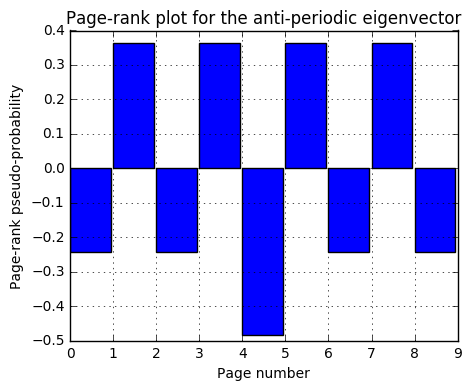

In [39]:
figure = plt.figure(figsize(5,4))
plt.bar(range(len(antip)), np.real(antip), width=0.95)
plt.grid()
plt.xlabel("Page number")
plt.ylabel("Page-rank pseudo-probability")
plt.title("Page-rank plot for the anti-periodic eigenvector")
plt.show()

Thus the naive page rank algorithm we use doesn't seem to work in every single case. If we imagine a linear combination of eigenvectors, including the one with eigenvalue -1, such that we have an initial well-normed probability distribution, we will not converge to a stationary distribution allowing us to rank our pages. 

The ranking for the stationary distribution however is the following. Predictably, the central (4-th) page is the most likely, and thus highest ranked one. 

In [41]:
print "Ranking, from top to bottom :"
for i in prank.argsort()[::-1]:
    print "Page "+str(i)+": PageRank "+str(np.real(prank[i]))

Ranking, from top to bottom :
Page 4: PageRank 0.166666666667
Page 7: PageRank 0.125
Page 5: PageRank 0.125
Page 3: PageRank 0.125
Page 1: PageRank 0.125
Page 6: PageRank 0.0833333333333
Page 0: PageRank 0.0833333333333
Page 2: PageRank 0.0833333333333
Page 8: PageRank 0.0833333333333


#### Dead-ends and spider traps

The first graph is the only one with a dead end, namely page 5. Let's write the adjacency matrix (neighbors array) as well as the transfer matrix for both prescriptions. In all cases, page i will be indexed by i-1 here.

In [43]:
#neighbors[i] is the list of pages that i has a link to
neighbors = np.asarray([[1,2],[0,3],[3,0],[2,1,4],[]])

#transfer matrices for first and second prescriptions : 
transfer1, transfer2 = np.zeros((5,5)), np.zeros((5,5))
#number of links per page
links= np.zeros(5)
for i in xrange(5):
    links[i]=len(neighbors[i])
    


In [44]:
for a in xrange(5):
    for b in neighbors[a]:
        transfer1[b,a] = 1/links[a]
        transfer2[b,a] = 1/links[a]
    if links[a]==0:
        for b in range(5):
            transfer2[b,a] = 1/4. if b!=a else 0

In [45]:
#check for normalization of the transfer matrices
print("summing columns")
print([ sum(transfer1[:,j]) for j in range(5)])
print([ sum(transfer2[:,j]) for j in range(5)])

summing columns
[1.0, 1.0, 1.0, 1.0, 0.0]
[1.0, 1.0, 1.0, 1.0, 1.0]


In [46]:
w1, v1 = np.linalg.eig(transfer1)
w2, v2 = np.linalg.eig(transfer2)

In [47]:
print w1

[ 0.     -0.9129  0.9129 -0.     -0.    ]


In [48]:
print w2

[-0.9082  1.     -0.0918  0.      0.    ]
